In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('BankNote_Authentication.csv')
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [6]:
X = data.drop('class',axis=1)
y = data['class']

In [7]:
y = np.array(y).reshape(-1,1)

In [8]:
classes = data['class'].unique()

In [9]:
classes

array([0, 1])

Text(0, 0.5, 'Skewness')

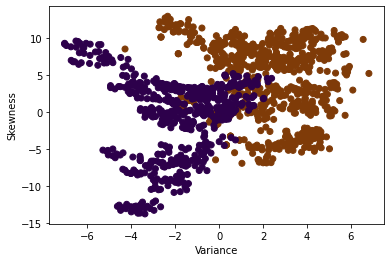

In [10]:
plt.scatter(data['variance'],data['skewness'],c=data['class'],cmap='PuOr')
plt.xlabel('Variance')
plt.ylabel('Skewness')

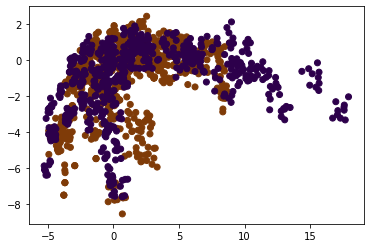

In [11]:
plt.scatter(data['curtosis'],data['entropy'],c=data['class'],cmap='PuOr')

<AxesSubplot:>

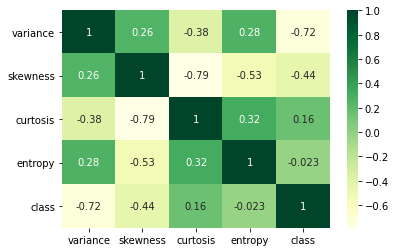

In [12]:
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='YlGn')

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.28,random_state=42)

In [14]:
X_train = X_train.T
y_train = y_train.T

X_test = X_test.T
y_test = y_test.T

print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))

X_train: (4, 987)
y_train: (1, 987)


In [15]:
def model(X,y):
    input_layer = X.shape[0]
    hidden_layer = 4
    output_layer = y.shape[0]
    return (input_layer, hidden_layer, output_layer)

(input_layer,hidden_layer,output_layer) = model(X_train,y_train)

print("input_shape: {}".format(input_layer))
print("hidden_shape: {}".format(hidden_layer))
print("output_shape: {}".format(output_layer))

input_shape: 4
hidden_shape: 4
output_shape: 1


In [16]:
def parameter_declare(input_unit, hidden_unit, output_unit):
    np.random.seed(2)
    W1 = np.random.randn(hidden_unit,input_unit)*0.01
    b1 = np.random.randn(hidden_unit,1)
    W2 = np.random.randn(output_unit,hidden_unit)*0.01
    b2 = np.random.randn(output_unit,1)
    k0 = np.random.randn(1,1)
    k1 = np.random.randn(1,1)
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2,
                  "k0":k0,
                  "k1":k1}
    return parameters

In [17]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def hidden_activation(z,k0,k1):
    return k0 + k1*z 

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    k0 = parameters['k0']
    k1 = parameters['k1']
    
    Z1 = np.dot(W1,X) + b1
    A1 = hidden_activation(Z1,k0,k1) # might require some changes
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}
    return A2, cache

In [18]:
def cross_entropy(A2, Y, parameters):
    m = Y.shape[1] # no. of training examples
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    return cost

In [19]:
def backpropagation(parameters, cache, X,Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T,dZ2)  # may occur error due to shape..try interchange
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    dk0 = (1/m)*np.sum(dA1)
    dk1 = (1/m)*np.multiply(dA1,Z1)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2,"dk0":dk0,"dk1":dk1}
    return grads

In [20]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    k0 = parameters['k0']
    k1 = parameters['k1']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dk0 = grads['dk0']
    dk1 = grads['dk1']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    k0 = k0 - learning_rate * dk0
    k1 = k1 - learning_rate * dk1
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2,"k0":k0,"k1":k1}
    
    return parameters

In [21]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 1000):
    np.random.seed(3)
    input_unit = model(X, Y)[0]
    output_unit = model(X, Y)[2]
    
    parameters = parameter_declare(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    k0 = parameters['k0']
    k1 = parameters['k1']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = cross_entropy(A2, Y, parameters)
        grads = backpropagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

parameters = neural_network_model(X_train, y_train, 4, 
                                  num_iterations=1000)

Cost after iteration 0: 0.688804
Cost after iteration 5: 0.688650
Cost after iteration 10: 0.688506
Cost after iteration 15: 0.688371
Cost after iteration 20: 0.688245
Cost after iteration 25: 0.688128
Cost after iteration 30: 0.688018
Cost after iteration 35: 0.687915
Cost after iteration 40: 0.687819
Cost after iteration 45: 0.687728
Cost after iteration 50: 0.687642
Cost after iteration 55: 0.687560
Cost after iteration 60: 0.687482
Cost after iteration 65: 0.687406
Cost after iteration 70: 0.687333
Cost after iteration 75: 0.687262
Cost after iteration 80: 0.687191
Cost after iteration 85: 0.687120
Cost after iteration 90: 0.687050
Cost after iteration 95: 0.686978
Cost after iteration 100: 0.686906
Cost after iteration 105: 0.686832
Cost after iteration 110: 0.686756
Cost after iteration 115: 0.686677
Cost after iteration 120: 0.686597
Cost after iteration 125: 0.686513
Cost after iteration 130: 0.686426
Cost after iteration 135: 0.686337
Cost after iteration 140: 0.686244
Cost af

<ipython-input-18-5c7f9288a135>:3: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
<ipython-input-18-5c7f9288a135>:3: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
<ipython-input-17-a51cc0c3ca15>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-19-4906448e69a3>:13: RuntimeWarning: overflow encountered in power
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
<ipython-input-19-4906448e69a3>:13: RuntimeWarning: invalid value encountered in multiply
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
/home/pradyumna/anaconda3/envs/ml_dl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Cost after iteration 760: nan
Cost after iteration 765: nan
Cost after iteration 770: nan
Cost after iteration 775: nan
Cost after iteration 780: nan
Cost after iteration 785: nan
Cost after iteration 790: nan
Cost after iteration 795: nan
Cost after iteration 800: nan
Cost after iteration 805: nan
Cost after iteration 810: nan
Cost after iteration 815: nan
Cost after iteration 820: nan
Cost after iteration 825: nan
Cost after iteration 830: nan
Cost after iteration 835: nan
Cost after iteration 840: nan
Cost after iteration 845: nan
Cost after iteration 850: nan
Cost after iteration 855: nan
Cost after iteration 860: nan
Cost after iteration 865: nan
Cost after iteration 870: nan
Cost after iteration 875: nan
Cost after iteration 880: nan
Cost after iteration 885: nan
Cost after iteration 890: nan
Cost after iteration 895: nan
Cost after iteration 900: nan
Cost after iteration 905: nan
Cost after iteration 910: nan
Cost after iteration 915: nan
Cost after iteration 920: nan
Cost after